In [1]:
#  ! pip install cufflinks --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style, colors
# from scipy.stats import binom
# import  statsmodels.stats.multitest as multitest
# from scipy.stats import ttest_ind
# import scipy.stats as stats
# import scipy.stats as ss
# import sys
# sys.path.append('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook')
# import sz_toolbox as szt
%matplotlib inline

import chart_studio.plotly as py
# import plotly.plotly as py
import plotly
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot

# cufflinks binds plotly directly to python dataframe
import cufflinks as cf
cf.go_offline()
# Set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
plotly.offline.init_notebook_mode(connected=True)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to enable jupyter ipython widgets run following line at command line
# jupyter nbextension enable --py widgetsnbextension
# to import ipywidgets in jupyter notebook
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# RPKMS

,patient,gene,rpkm,HIV_status,mut_status
0,HTMCP-03-06-02001,CASP8,1.5312,Positive,mut
1,HTMCP-03-06-02001,FAT1,23.6036,Positive,wt


Text(0.5, 0, 'SMGs')

Text(0, 0.5, 'RPKM')

Text(0.5, 1.0, 'SMGs expression')

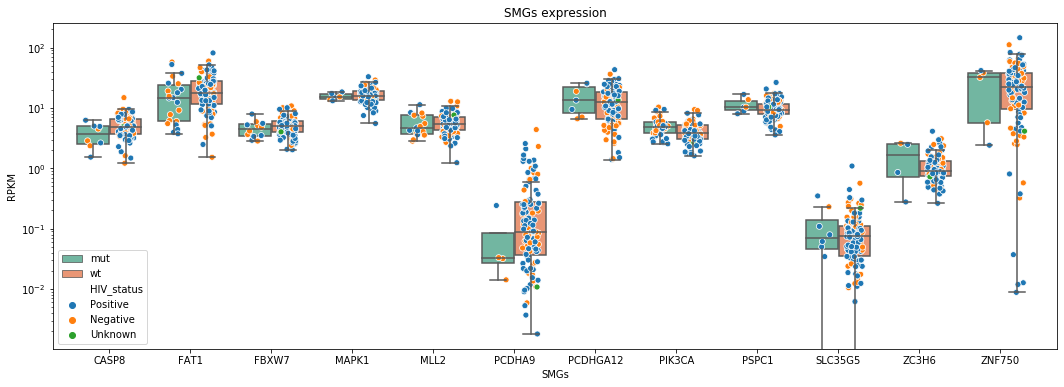

In [3]:
### grouped box plot with points overlayed and colored by additional categories
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/smgs_expression_20190607.csv'
dfm = pd.read_csv(of)
dfm.head(2)


f, ax = plt.subplots(figsize=(18,6))
s = sns.boxplot(x='gene', y='rpkm', data=dfm, hue='mut_status', palette="Set2", fliersize=0, ax=ax)


ticks = ax.get_xticks()
labels = [ t.get_text() for t in ax.get_xticklabels()]
tlmap_dict = {k:v for v, k in zip(ticks-.3, labels)}
tlmap2_dict = {k:v for v, k in zip(ticks+.1, labels)}


dfm1 = dfm[dfm.mut_status=='mut']
dfm1['xs'] = dfm1['gene'].map(tlmap_dict) + np.random.uniform(0.0, 0.2, size=dfm1.shape[0])
dfm2 = dfm[dfm.mut_status=='wt']
dfm2['xs'] = dfm2['gene'].map(tlmap2_dict) + np.random.uniform(0.0, 0.2, size=dfm2.shape[0])

dfc = pd.concat([dfm1, dfm2])



sns.scatterplot(x='xs', y='rpkm', data=dfc, hue='HIV_status', x_jitter=True) # jitter does not work


ax.set_yscale('log')
ax.set_xlabel('SMGs')
ax.set_ylabel('RPKM')
ax.set_title('SMGs expression')



of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/SMGs_expression_boxlot_20190610.pdf'
# plt.savefig(of, bbox_inches='tight', dpi=300)
plt.show()

Text(0.5, 0, '')

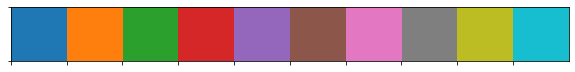

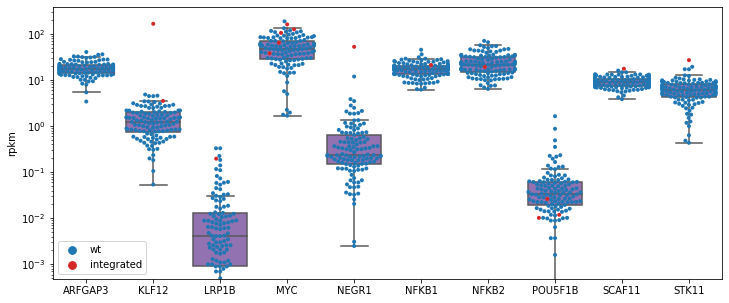

In [4]:
### seaborn boxplot overlay points, with hue for points, use a list colors
# default 10 plotly colors 
clrs = [
'#1f77b4',  # muted blue
'#ff7f0e',  # safety orange
'#2ca02c',  # cooked asparagus green
'#d62728',  # brick red
'#9467bd',  # muted purple
'#8c564b',  # chestnut brown
'#e377c2',  # raspberry yogurt pink
'#7f7f7f',  # middle gray
'#bcbd22',  # curry yellow-green
'#17becf'   # blue-teal
]
sns.palplot(clrs)
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'
# f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
df = pd.read_csv(f)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
_ = ax.set_yscale('log')
sns.boxplot('gene', 'rpkm',  data=df, fliersize=0, color=clrs[4])
sns.swarmplot('gene', 'rpkm',  data=df, hue='integration', palette = [clrs[0], clrs[3]],
              size=4)
ax.legend(loc='lower left')
ax.set_xlabel('')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_expression_box_swarmplot.pdf'
# plt.savefig(of, bbox_inches='tight', dpi=300)
plt.show()

,sample,QC_metrics,metrics_value
0,HTMCP-03-06-02025-01A-01D,X coverage (incl. duplicate reads),183.899176
1,HTMCP-03-06-02025-10A-01D,X coverage (incl. duplicate reads),285.534514


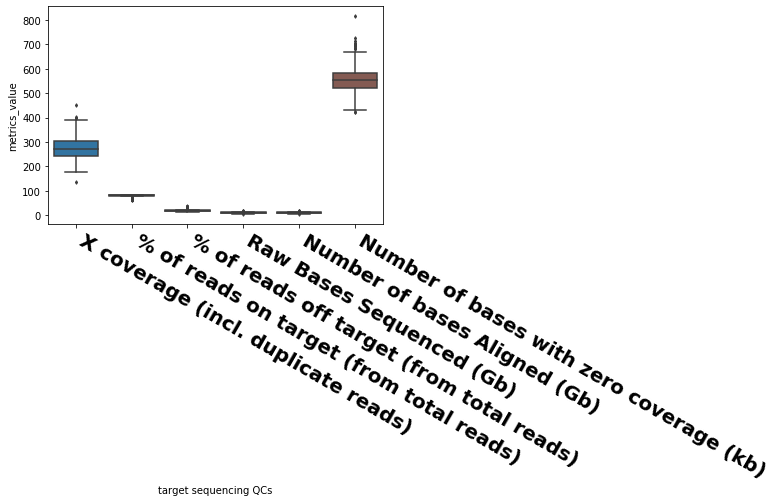

In [5]:
### seaborn simple boxplot
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/QC.csv'
df = pd.read_csv(f)
df.head(2)

f, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='QC_metrics', y='metrics_value', data=df, fliersize=2.5, ax=ax)
# ax.set to set ax properties
_ = ax.set(xlabel='target sequencing QCs')
xticklabels = ax.get_xticklabels()
_ = ax.set_xticklabels(xticklabels, rotation=-30, fontweight='bold', fontsize=20, horizontalalignment='left')
# use plt.setp to set property for any object
# props = {"rotation" : -30}
# plt.setp(ax.get_xticklabels(), **props)

,sample,QC_metrics,metrics_value
0,HTMCP-03-06-02025-01A-01D,X coverage (incl. duplicate reads),183.899176
1,HTMCP-03-06-02025-10A-01D,X coverage (incl. duplicate reads),285.534514


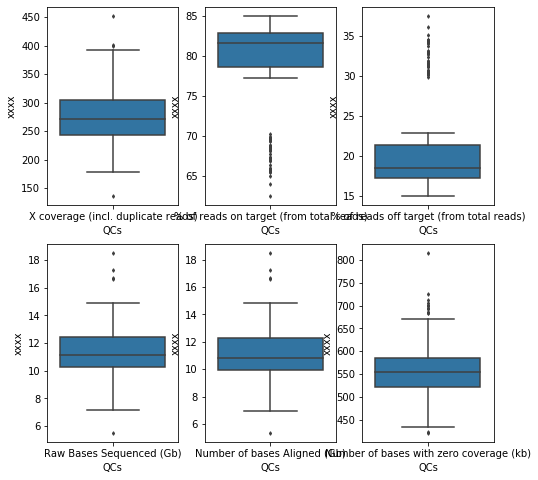

In [6]:
### seaborn boxplot in subplots access subplots programatically
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/QC.csv'
df = pd.read_csv(f)
df.head(2)

f, axes = plt.subplots(2, 3, figsize=(8,8))
cols = df.QC_metrics.unique()
# flatten axes in multiple rows and columns to access programatically
for c, ax in zip(cols, axes.flatten()):
    _ = sns.boxplot(x='QC_metrics', y='metrics_value', data=df[df['QC_metrics']==c], fliersize=2.5, ax=ax)
    # ax.set set ax properties
    _ = ax.set(xlabel='QCs', ylabel='xxxx')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/validation/validation_qc.png'
# plt.savefig(of, bbox_inches='tight')


,patient,gene,rpkm,integration
354,HTMCP-03-06-02001,MYC,44.4223,wt
355,HTMCP-03-06-02002,MYC,47.1335,wt


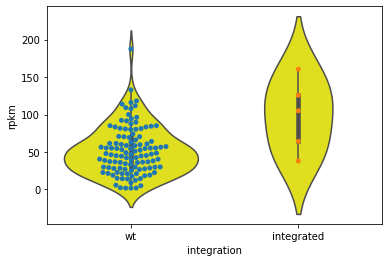

In [7]:
### sns violin plot overlay points

f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'
df = pd.read_csv(f)
df = df[df.gene == 'MYC']
df.head(2)
ax = sns.violinplot('integration', 'rpkm', data=df, color='yellow')
sns.swarmplot('integration', 'rpkm', data=df)
plt.show()

In [8]:
### ipython interact boxplot of expression for a list of genes
# f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'
df = pd.read_csv(f)
@interact
def splot(genes=list( df['gene'].unique())):
    fig = plt.figure(figsize=(6, 8))
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    dftmp =  df[ df.gene==genes]
    sns.boxplot('gene', 'rpkm',  data=dftmp, color='yellow', fliersize=0, width=0.3)
    sns.swarmplot('gene', 'rpkm', data=dftmp, hue='integration', palette=["#3D9970","#FF4136"])
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    ax.tick_params(labelsize=15)
    ax.set(xlabel='', ylabel='RPKM')
    
    of = f'/projects/trans_scratch/validations/workspace/szong/Cervical/integration/{genes}_integration_expression_box_swarmplot.png'
#     plt.savefig(of, dpi=200, bbox_inches='tight')
    plt.show()

interactive(children=(Dropdown(description='genes', options=('ARFGAP3', 'KLF12', 'LRP1B', 'MYC', 'NEGR1', 'NFK…

In [9]:
### use ipython interact widgets to dynamically inspect data
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
df = pd.read_csv(f)
df.head(2)

@interact
def show_gene(column=['MYC', 'KLF12'], rpkm=(1, 200, 10)):
### use ipython interact widgets to dynamically inspect data    
    return df.loc[(df[column] > rpkm)][['MYC', 'KLF12']]

,Unnamed: 0,ARFGAP3,KLF12,LRP1B,MYC,NEGR1,NFKB1,NFKB2,POU5F1B,SCAF11,STK11
0,HTMCP-03-06-02001,19.5059,1.2406,0.0591,44.4223,0.1510,28.2237,25.3240,0.0614,8.1612,7.7324
1,HTMCP-03-06-02002,15.5748,0.3155,0.0177,47.1335,0.0664,24.0621,11.3559,0.1385,8.6626,3.7501


interactive(children=(Dropdown(description='column', options=('MYC', 'KLF12'), value='MYC'), IntSlider(value=9…

In [6]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/118_patient_rpkm.csv'
expr = pd.read_csv(f, index_col='gene')
expr.shape
expr.head(2)

(51595, 118)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02036,HTMCP-03-06-02037,...,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447
gene,,,,,,,,,,,,,,,,,,,,,
10_PPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_FKBP10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
adf = expr.T
adf.head(2)

gene,10_PPIB,12_FKBP10,13_CALCA,15_UBE3A,16_ADA,17_AICDA,18_AIRE,1_COL1A1,21_BLNK,22_C1QA,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
HTMCP-03-06-02001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.9183,0.5696,2.6186,7.061,2.0182,0.0,6.8391,39.2288,4.6830,8.7451
HTMCP-03-06-02002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.1353,1.2758,3.2289,4.329,0.2457,0.0,6.4751,79.9902,3.9416,6.7653


In [8]:
adf[adf.RAB11A >60]

gene,10_PPIB,12_FKBP10,13_CALCA,15_UBE3A,16_ADA,17_AICDA,18_AIRE,1_COL1A1,21_BLNK,22_C1QA,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
HTMCP-03-06-02075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.1712,0.7293,2.4798,4.9006,0.6989,0.0,7.9852,47.7038,2.8363,3.5696
HTMCP-03-06-02210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.2486,0.6917,2.3739,8.7193,1.6169,0.0,4.2990,49.3276,4.2569,4.8234


In [9]:
@interact
def show_gene(column=['RAB11A', 'KLF12'], rpkm=(1, 200, 10)):
    return adf.loc[(adf[column] > rpkm)][['RAB11A', 'KLF12']]

interactive(children=(Dropdown(description='column', options=('RAB11A', 'KLF12'), value='RAB11A'), IntSlider(v…

# Genes of interest

In [7]:
dct = {'NEGR1': 'HTMCP-03-06-02330',
       'LRP1B': 'HTMCP-03-06-02063',
       'KLF12': 'HTMCP-03-06-02047_HTMCP-03-06-02040', 
       'SCAF11': 'HTMCP-03-06-02006',
       'POU5F1B': 'HTMCP-03-06-02058_HTMCP-03-06-02110_HTMCP-03-06-02267',
       'STK11': 'HTMCP-03-06-02046',
       'NFKB1': 'HTMCP-03-06-02020',
       'NFKB2': 'HTMCP-03-06-02020',
       'ARFGAP3': 'HTMCP-03-06-02002',
      'MYC':'HTMCP-03-06-02110_HTMCP-03-06-02058_HTMCP-03-06-02267_HTMCP-03-06-02322_HTMCP-03-06-02149'}

In [8]:
dfx = pd.DataFrame(dct, index=[0]).T
dfx['integration'] = 'integrated'
dfx.columns = ['pats', 'integrated']
s = dfx.pats.str.split('_', expand=True).stack()
idx = s.index.get_level_values(0)
dfy = dfx.loc[idx]
dfy['patient'] = list(s)
idx
dfy = (dfy.reset_index()).drop('pats', axis=1)
dfy.columns = ['gene', 'integration', 'patient']
dfy[:2]
# pd.DataFrame.from_dict(dct)

Index(['NEGR1', 'LRP1B', 'KLF12', 'KLF12', 'SCAF11', 'POU5F1B', 'POU5F1B',
       'POU5F1B', 'STK11', 'NFKB1', 'NFKB2', 'ARFGAP3', 'MYC', 'MYC', 'MYC',
       'MYC', 'MYC'],
      dtype='object')

,gene,integration,patient
0,NEGR1,integrated,HTMCP-03-06-02330
1,LRP1B,integrated,HTMCP-03-06-02063


In [139]:
# dfy.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_cases.txt', index=False)

In [9]:
expr = expr.reset_index()
df = expr[expr.gene.isin(dct.keys())].set_index('gene').T

In [10]:
df.head(2)


gene,ARFGAP3,KLF12,LRP1B,MYC,NEGR1,NFKB1,NFKB2,POU5F1B,SCAF11,STK11
HTMCP-03-06-02001,19.5059,1.2406,0.0591,44.4223,0.1510,28.2237,25.3240,0.0614,8.1612,7.7324
HTMCP-03-06-02002,15.5748,0.3155,0.0177,47.1335,0.0664,24.0621,11.3559,0.1385,8.6626,3.7501


In [11]:
of = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
# df.to_csv(of)
df = pd.read_csv(of)
df.head(2)

,Unnamed: 0,ARFGAP3,KLF12,LRP1B,MYC,NEGR1,NFKB1,NFKB2,POU5F1B,SCAF11,STK11
0,HTMCP-03-06-02001,19.5059,1.2406,0.0591,44.4223,0.1510,28.2237,25.3240,0.0614,8.1612,7.7324
1,HTMCP-03-06-02002,15.5748,0.3155,0.0177,47.1335,0.0664,24.0621,11.3559,0.1385,8.6626,3.7501


# plot all genes

In [12]:
@interact
def box_plot(col=list(df.columns), 
             theme=list(cf.themes.THEMES.keys()), 
             colorscale=list(cf.colors._scales_names.keys())):
    data = go.Box(y=df[col], name=col, boxpoints='all', pointpos=0, jitter=1, text=df[col].index.tolist()) 

    layout = go.Layout(title=col, width=600, height=600)
    fig = go.Figure(data=[data], layout=layout)
    iplot(fig)                         

interactive(children=(Dropdown(description='col', options=('Unnamed: 0', 'ARFGAP3', 'KLF12', 'LRP1B', 'MYC', '…

In [11]:
# expr = expr.reset_index()
df = expr[expr.gene.isin(dct.keys())].set_index('gene').T.reset_index()

In [12]:
df1 = pd.melt(df, id_vars='index', value_name='rpkm', var_name='genes')
df1.columns = ['patient', 'gene', 'rpkm']
df1.head(2)

,patient,gene,rpkm
0,HTMCP-03-06-02001,ARFGAP3,19.5059
1,HTMCP-03-06-02002,ARFGAP3,15.5748


In [13]:
df2 = pd.merge(df1, dfy, left_on=['patient', 'gene'], right_on=[ 'patient','gene'], how='left').fillna('wt')
df2.head(2)

,patient,gene,rpkm,integration
0,HTMCP-03-06-02001,ARFGAP3,19.5059,wt
1,HTMCP-03-06-02002,ARFGAP3,15.5748,integrated


In [14]:
df2[df2.integration=='integrated'][:2]
# df2.fillna('WT', inplace=True)


,patient,gene,rpkm,integration
1,HTMCP-03-06-02002,ARFGAP3,15.5748,integrated
128,HTMCP-03-06-02040,KLF12,3.5184,integrated


In [13]:
of = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'
# df2.to_csv(of, index=False)
df2 = pd.read_csv(of)
df2.head(2)

,patient,gene,rpkm,integration
0,HTMCP-03-06-02001,ARFGAP3,19.5059,wt
1,HTMCP-03-06-02002,ARFGAP3,15.5748,integrated


In [14]:
@interact
def splot(genes=list(df2['gene'].unique())):
    fig = plt.figure(figsize=(6, 8))
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    dftmp = df2[df2.gene==genes]
    sns.boxplot('gene', 'rpkm',  data=dftmp, color='yellow', fliersize=0, width=0.3)
    sns.swarmplot('gene', 'rpkm', data=dftmp, hue='integration', palette=["#3D9970","#FF4136"])
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    ax.tick_params(labelsize=15)
    ax.set(xlabel='', ylabel='RPKM')
    
    of = f'/projects/trans_scratch/validations/workspace/szong/Cervical/integration/{genes}_integration_expression_box_swarmplot.png'
#     plt.savefig(of, dpi=200, bbox_inches='tight')
    plt.show()

interactive(children=(Dropdown(description='genes', options=('ARFGAP3', 'KLF12', 'LRP1B', 'MYC', 'NEGR1', 'NFK…

In [25]:
np.ones((1,5))
np.squeeze(np.ones((1,5)), axis=0)

array([[1., 1., 1., 1., 1.]])

array([1., 1., 1., 1., 1.])

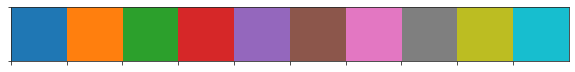

In [15]:
# default 10 plotly colors 
clrs = [
'#1f77b4',  # muted blue
'#ff7f0e',  # safety orange
'#2ca02c',  # cooked asparagus green
'#d62728',  # brick red
'#9467bd',  # muted purple
'#8c564b',  # chestnut brown
'#e377c2',  # raspberry yogurt pink
'#7f7f7f',  # middle gray
'#bcbd22',  # curry yellow-green
'#17becf'   # blue-teal
]
sns.palplot(clrs)

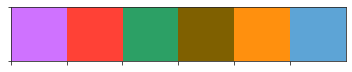

In [16]:
# colors = [rgba(93, 164, 214, 0.5), rgba(255, 144, 14, 0.5), rgba(44, 160, 101, 0.5), rgba(255, 65, 54, 0.5), rgba(207, 114, 255, 0.5), rgba(127, 96, 0, 0.5)]
colors = ['#CF72FF','#FF4136','#2CA065','#7F6000','#FF900E','#5DA4D6']
sns.palplot(colors)

In [27]:
data=[go.Box(y=df2[df2.gene==col]['rpkm'], 
             name=col, boxpoints='all', 
             pointpos = 0, 
             jitter=.25, 
             
             text=df2[df2.gene==col]['patient']) for col in df2.gene.unique()]

layout=go.Layout(title='expression',
                width=600,
                height=400,
                yaxis=dict(type='log', autorange=True))

fig = go.Figure(data=data, layout=layout)

iplot(fig) 

# boxplot and swarmplot

In [19]:
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/GPR126_expression.csv'
df = pd.read_csv(f)
df.head(2)

,patient,GPR126,mut_status,xx
0,HTMCP-03-06-02001,11.1634,False,2
1,HTMCP-03-06-02002,1.8584,False,2


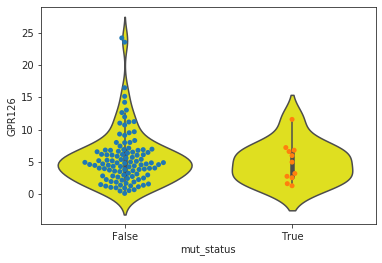

In [20]:
ax = sns.violinplot('mut_status', 'GPR126', data=df, color='yellow')
sns.swarmplot('mut_status', 'GPR126', data=df)


of = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/GPR126.patients.expression_violin_swarmplot.png'
plt.savefig(of, dpi=200)
plt.show()

In [1]:
### seaborn boxplot overlay points, specify box face and edgecolors
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/GPR126_expression.csv'
df = pd.read_csv(f)
df.head(2)
ax = sns.boxplot('xx', 'GPR126', data=df, color='yellow')
sns.swarmplot('xx', 'GPR126', data=df)
# Select which box you want to change    
mybox = ax.artists[1]

# Change the appearance of that box
mybox.set_facecolor('red')
mybox.set_edgecolor('gray')
# mybox.set_linewidth(2)

# Select which box you want to change    
mybox = ax.artists[0]

# Change the appearance of that box
mybox.set_facecolor('blue')
mybox.set_edgecolor('gray')
# mybox.set_linewidth(2)

plt.show()

NameError: name 'pd' is not defined

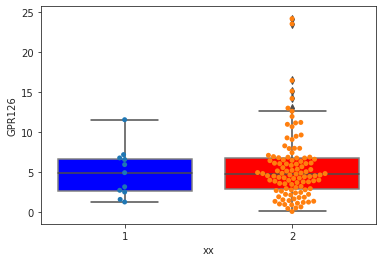

In [21]:
ax = sns.boxplot('xx', 'GPR126', data=df, color='yellow')
sns.swarmplot('xx', 'GPR126', data=df)
# Select which box you want to change    
mybox = ax.artists[1]

# Change the appearance of that box
mybox.set_facecolor('red')
mybox.set_edgecolor('gray')
# mybox.set_linewidth(2)

# Select which box you want to change    
mybox = ax.artists[0]

# Change the appearance of that box
mybox.set_facecolor('blue')
mybox.set_edgecolor('gray')
# mybox.set_linewidth(2)


of = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/GPR126.patients.expression_box_swarmplot.png'
# plt.savefig(of, dpi=200)
plt.show()

# plotly box plot with points

In [34]:
df.head()

,patient,GPR126,mut_status,xx
0,HTMCP-03-06-02001,11.1634,False,2
1,HTMCP-03-06-02002,1.8584,False,2
2,HTMCP-03-06-02003,7.9967,False,2
3,HTMCP-03-06-02006,4.7846,False,2
4,HTMCP-03-06-02008,6.0840,False,2


In [28]:
dfm = df.pivot(index='patient', columns='xx', values='GPR126')
dfm.columns = ['mut', 'wt']
dfm.head(2)

data=[go.Box(y=dfm[col], name=col, boxpoints='all', pointpos = 0, jitter=1, text=dfm[col].index.tolist()) for col in dfm.columns]

layout=go.Layout(title='expression of gpr126',
                width=600,
                height=600)

fig = go.Figure(data=data, layout=layout)

iplot(fig)                                              
                                                                                                                          

,mut,wt
patient,,
HTMCP-03-06-02001,NaN,11.1634
HTMCP-03-06-02002,NaN,1.8584


# plotly group bar plot

In [55]:
# plotly.io.orca.config.executable = '/projects/da_workspace/software/miniconda/envs/dlpy3/bin/orca'
plotly.io.orca.config.executable = '/projects/da_workspace/software/miniconda/envs/da/bin/orca'    


In [29]:
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/gene_frequency.txt'
dfsmg = pd.read_csv(f)

In [30]:
dfsmg

,gene,mutation_frequency_x,mutation_frequency_y
0,PIK3CA,0.347458,0.333333
1,FAT1,0.186441,0.126437
2,MLL2,0.144068,NaN
3,FBXW7,0.101695,0.172414
4,SLC35G5,0.067797,0.034483
5,CASP8,0.067797,0.091954
6,PSPC1,0.050847,NaN
7,PCDHGA12,0.050847,0.045977
8,MAPK1,0.050847,0.022989
9,ZNF750,0.042373,0.011494


In [50]:
trace1 = go.Bar(x=dfsmg.gene,
                y=dfsmg.mutation_frequency_x,
                name='HTMCP discovery')
trace2 = go.Bar(x=dfsmg.gene,
                y=dfsmg.mutation_frequency_y,
                name='HTMCP validation')

data = [trace1, trace2]
layout = go.Layout(barmode='group',
                   width=700,
                   height=500,
                  yaxis=dict(type='-', title='mutation frequency'),
                  xaxis=dict(title=''))

fig = go.Figure(data=data, layout=layout)

# iplot(fig, filename='xxx.pdf')
pio.write_image(fig, '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_discovery_vs_validation.pdf')

ValueError: Image generation requires the psutil package.

Install using pip:
    $ pip install psutil

Install using conda:
    $ conda install psutil
